<a href="https://colab.research.google.com/github/cuboidalstudios/MLAssignment2025/blob/main/MLTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Churn EDA Notebook
### Machine Learning Coursework – Task 1
This notebook performs data cleaning, feature engineering, and exploratory data analysis on the Telco Customer Churn dataset.

## Import Libraries

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

## Load Dataset

In [128]:
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Telco-Customer-Churn.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleaning & Feature Engineering

In [129]:
# Find Missing Values
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [130]:
# Clean TotalCharges
# Convert TotalCharges to numeric, coerce errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Remove rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [131]:
# Encode churn labels (Yes = 1, No = 0)
df['Churn_encoded'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Create average monthly spend
df['AvgMonthlySpend'] = df['TotalCharges'] / df['tenure']

# Create tenure categories (binning)
df['TenureCategory'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 100],
    labels=['0-1yr', '1-2yr', '2-4yr', '4+yr']
)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_encoded,AvgMonthlySpend,TenureCategory
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,29.850000,0-1yr
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,0,55.573529,2-4yr
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,54.075000,0-1yr
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,40.905556,2-4yr
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,75.825000,0-1yr


* changed totalcharges to a numeric value
* created the feature Churn_encoded to easier perform EDA
* created the feature AvgMonthlySpend to enable us to fairly compare records despite Contracts
* used binning to create the feature TenureCategories for representation of tenure in a graphical format





# Exploratory Data Analysis

### Five Number Summary

In [132]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlySpend']
df[num_cols].describe().loc[['min', '25%', '50%', '75%', 'max']]

,tenure,MonthlyCharges,TotalCharges,AvgMonthlySpend
min,1.0,18.2500,18.8000,13.775000
25%,9.0,35.5875,401.4500,36.179891
50%,29.0,70.3500,1397.4750,70.373239
75%,55.0,89.8625,3794.7375,90.179560
max,72.0,118.7500,8684.8000,121.400000


### Churn distribution

In [133]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


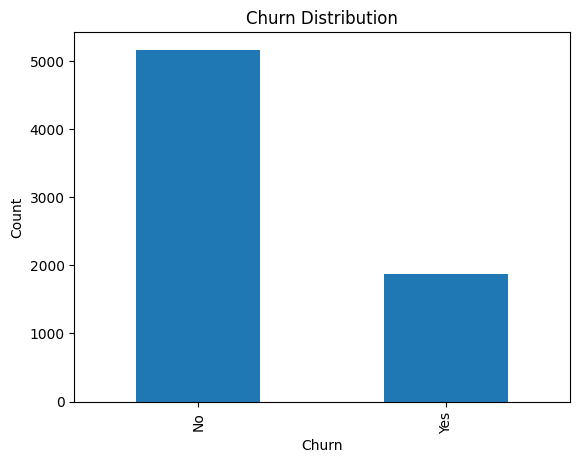

In [134]:
df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
# plt.grid(True)
plt.show()

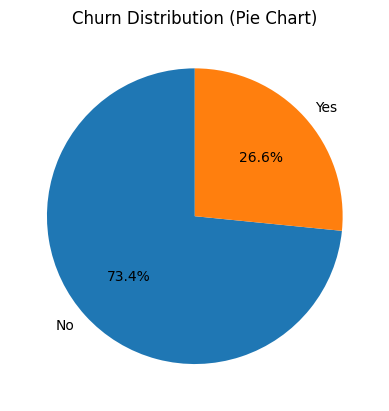

In [135]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution (Pie Chart)')
plt.ylabel('') # Hide the y-label for pie charts
plt.show()

Most customers did not churn (73%), while some customers (27%) did.

### tenure distribution

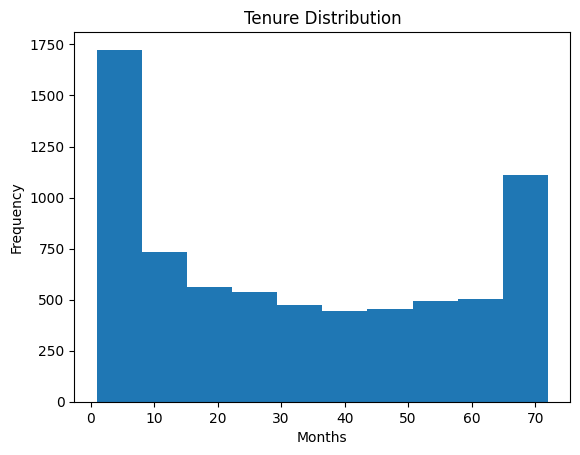

In [136]:
# Plot tenure distribution
df['tenure'].plot(kind='hist')
plt.title('Tenure Distribution')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.show()

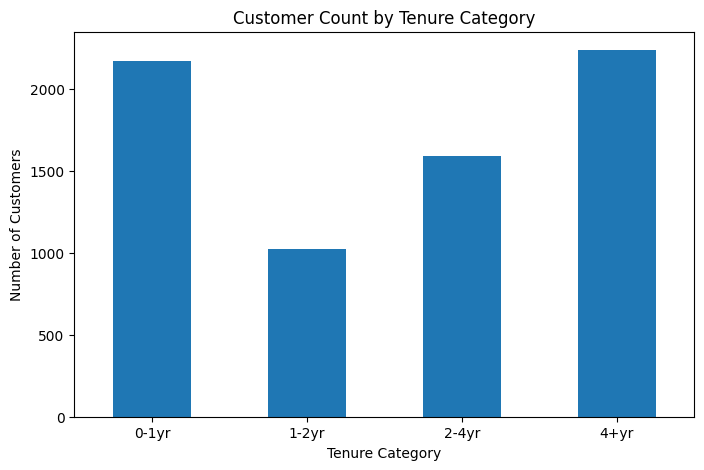

In [137]:
# Count of customers per tenure category
tenure_counts = df['TenureCategory'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8,5))
tenure_counts.plot(kind='bar')

plt.title('Customer Count by Tenure Category')
plt.xlabel('Tenure Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

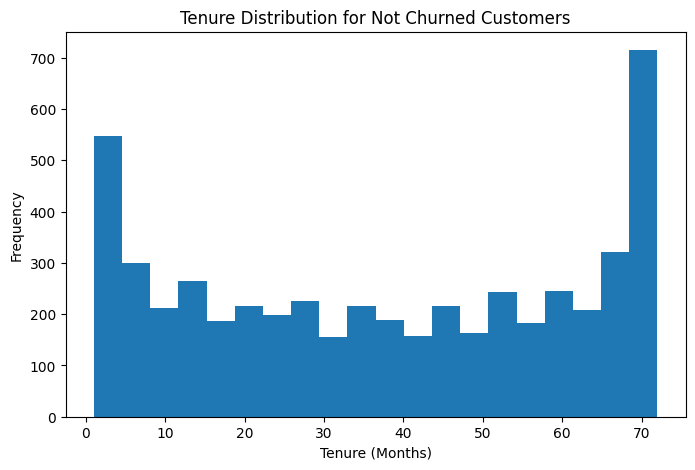

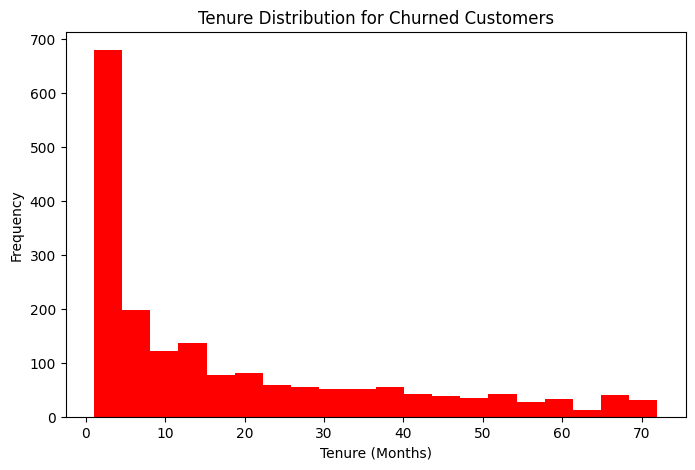

In [138]:
plt.figure(figsize=(8,5))

df[df['Churn']=='No']['tenure'].plot(kind='hist', bins=20)
plt.title('Tenure Distribution for Not Churned Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,5))

df[df['Churn']=='Yes']['tenure'].plot(kind='hist',color = 'red', bins=20)
plt.title('Tenure Distribution for Churned Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

The majority of customers tenure was for around 1 month. however factoring out churned customers we can see that non churn customers follow an inverse normal distribution. which can suggest that customers stayed with the service for extensive periods of time or would try it for a small period of time and churn

### Numerical Feature Correlation Analysis

In [139]:
# Correlation matrix
df_corr = df.corr(numeric_only=True)
df_corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_encoded,AvgMonthlySpend
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541,0.217616
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049,0.246198
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858,0.996237
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,0.650915
Churn_encoded,0.150541,-0.354049,0.192858,-0.199484,1.000000,0.192033
AvgMonthlySpend,0.217616,0.246198,0.996237,0.650915,0.192033,1.000000


<Axes: >

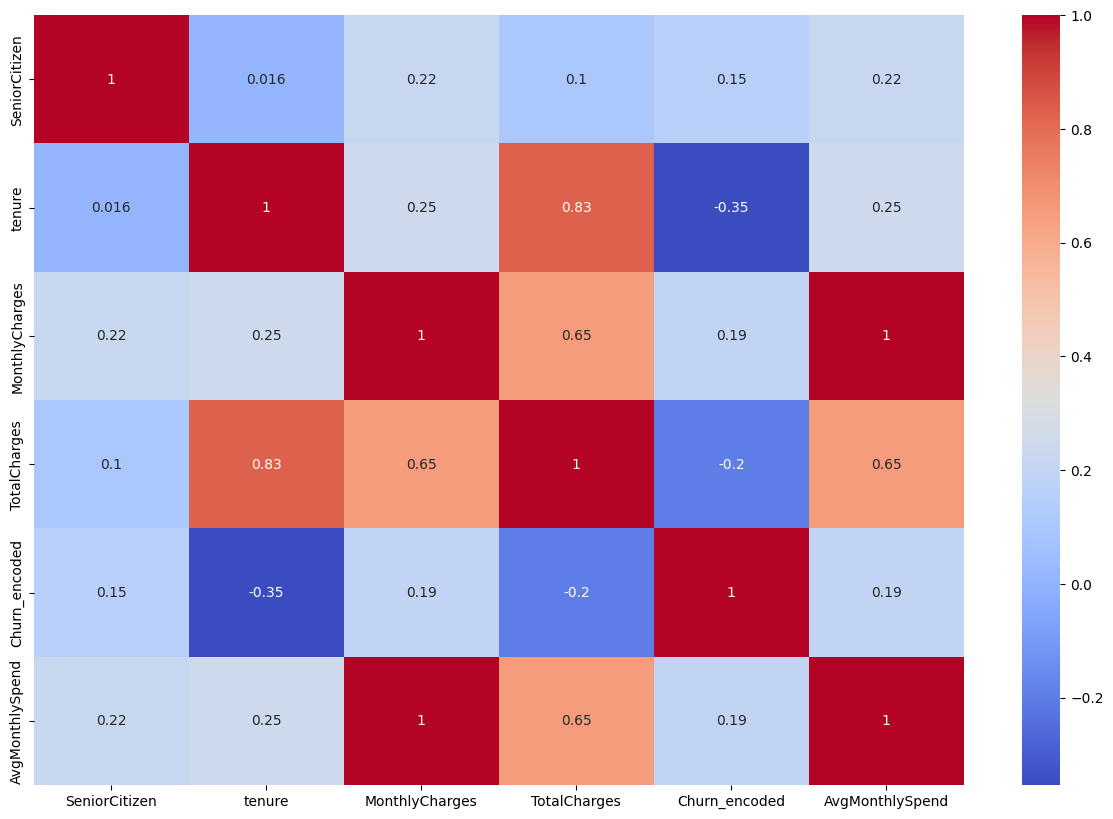

In [140]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

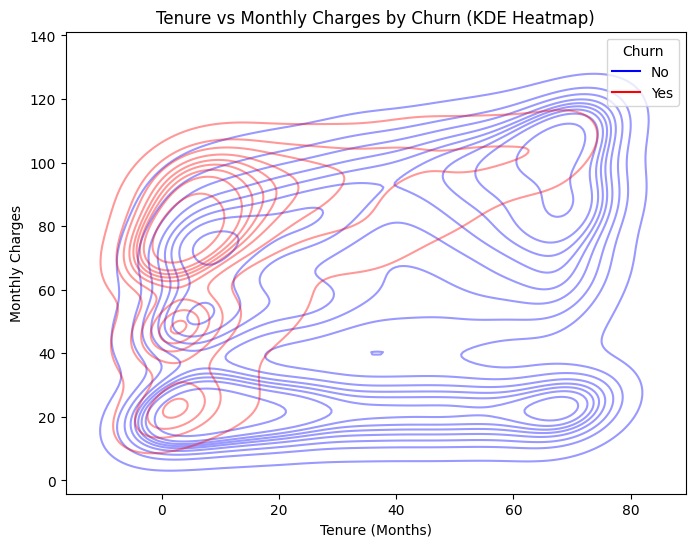

In [141]:
plt.figure(figsize=(8,6))

sns.kdeplot(
    data=df,
    x='tenure',
    y='MonthlyCharges',
    hue='Churn',
    fill=False,
    alpha=0.4,
    palette=['blue','red']
)

plt.title('Tenure vs Monthly Charges by Churn (KDE Heatmap)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.show()

Here we can see that Tenure has a strong correlation with monthly charges (along with total charges from which monthly charges is derieved.)

Using the above heatmap we can see that high monthly charges lead to low tenure and a higher density of churned customers

### correlation analysis of categorical features by churn

Cramers V is used here to compare the correlation of categorical features generating a number between 0-1

the following interpretation table was used:

| Cramér’s V | Strength of Association |
|------------|-----------------------|
| 0.00 – 0.10 | Negligible |
| 0.11 – 0.20 | Weak |
| 0.21 – 0.35 | Moderate |
| 0.36 – 0.50 | Strong |
| > 0.50      | Very Strong |

In [142]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))


In [143]:
categorical_cols = df.select_dtypes(include='object').columns.drop('customerID')  # all categorical except ID

cat_corr = {}
for col in categorical_cols:
    cat_corr[col] = cramers_v(df[col], df['Churn_encoded'])

# Convert to a sorted series
cat_corr = pd.Series(cat_corr).sort_values(ascending=False)
cat_corr

,0
Churn,0.999636
Contract,0.409560
OnlineSecurity,0.346992
TechSupport,0.342506
InternetService,0.321909
PaymentMethod,0.302960
OnlineBackup,0.291902
DeviceProtection,0.281159
StreamingMovies,0.230702
StreamingTV,0.230143


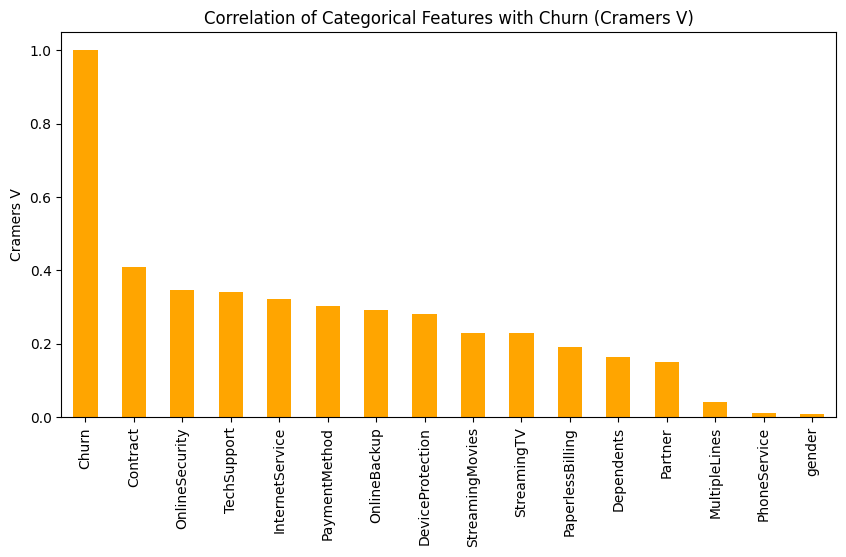

In [144]:
plt.figure(figsize=(10,5))
cat_corr.plot(kind='bar', color='orange')
plt.title("Correlation of Categorical Features with Churn (Cramers V)")
plt.ylabel("Cramers V")
plt.show()

Through Cramer's V analysis we can see that contract type as well as whether or not the customer opted for online security have a strong correlation to customer churn

### Monthly Charges by Churn

<Figure size 800x500 with 0 Axes>

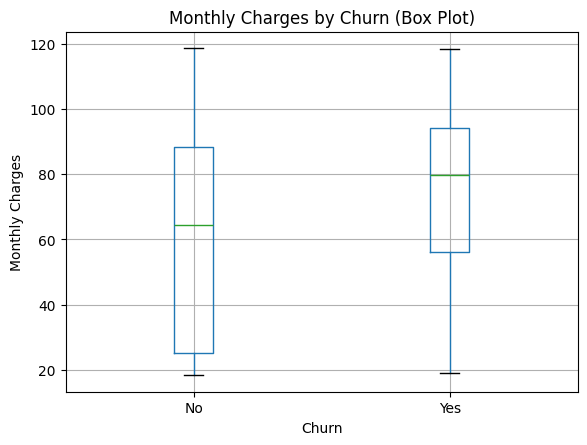

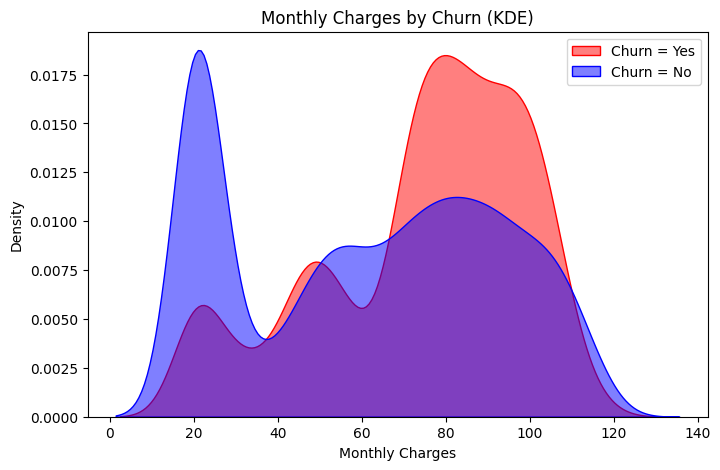

In [145]:
# Box Plot
plt.figure(figsize=(8,5))

df.boxplot(column='MonthlyCharges', by='Churn')
plt.title("Monthly Charges by Churn (Box Plot)")
plt.suptitle('')
plt.ylabel("Monthly Charges")
plt.show()

# KDE plot (filled) per churn group
plt.figure(figsize=(8,5))

sns.kdeplot(
    data=df[df['Churn']=='Yes'], x='MonthlyCharges', fill=True, color='red', alpha=0.5, label='Churn = Yes'
)
sns.kdeplot(
    data=df[df['Churn']=='No'], x='MonthlyCharges', fill=True, color='blue', alpha=0.5, label='Churn = No'
)

plt.title('Monthly Charges by Churn (KDE)')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()

here we can see that customers with lower fees around the 20 monthly charges range did not churn while we can see a drastic increase in customer churn as the price increased.

### Tenure by Churn

<Figure size 800x500 with 0 Axes>

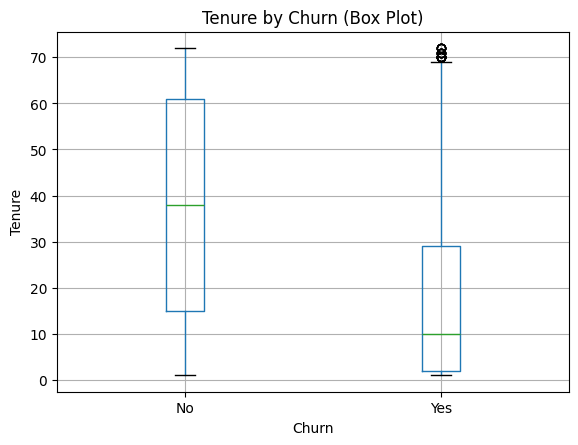

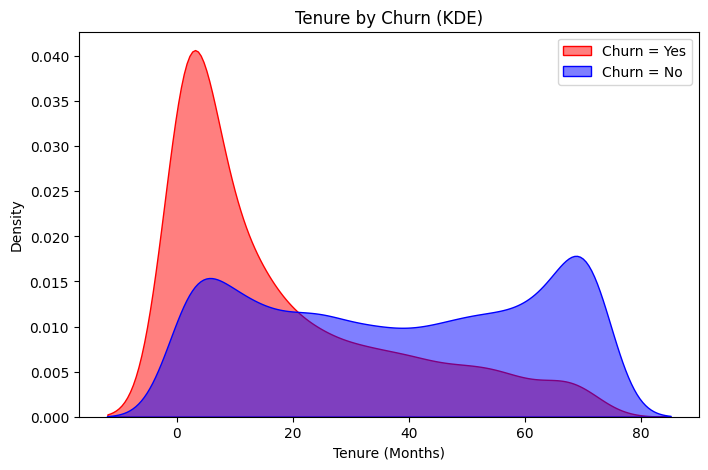

In [146]:
# Box Plot
plt.figure(figsize=(8,5))

df.boxplot(column='tenure', by='Churn')
plt.title("Tenure by Churn (Box Plot)")
plt.suptitle('')
plt.ylabel("Tenure")
plt.show()


# KDE plot
plt.figure(figsize=(8,5))

sns.kdeplot(
    data=df[df['Churn']=='Yes'], x='tenure', fill=True, color='red', alpha=0.5, label='Churn = Yes'
)
sns.kdeplot(
    data=df[df['Churn']=='No'], x='tenure', fill=True, color='blue', alpha=0.5, label='Churn = No'
)

plt.title('Tenure by Churn (KDE)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.legend()
plt.show()

the density of most churn customers is within the 1 - 10 month range. while non churn customers comparitively have an even distribution. however by themselves they have a inverse normal distribution.

### Contract Type by Churn

<Figure size 800x500 with 0 Axes>

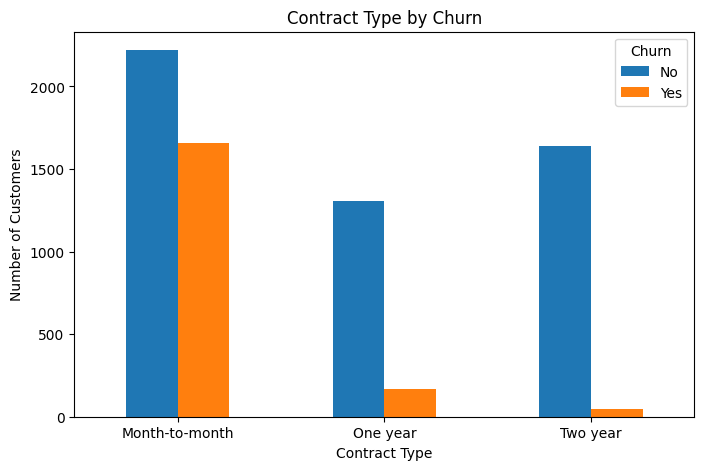

In [147]:
plt.figure(figsize=(8,5))

# Count of churn per contract type
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack()

# Double bar chart
contract_churn.plot(kind='bar', figsize=(8,5))

plt.title('Contract Type by Churn')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

here we can see there is a steep correlation between the duration of a contract as well as the churn of a customer. with non churn customers having opted for longer term contracts and vice versa

### Online Security by Churn

<Figure size 800x500 with 0 Axes>

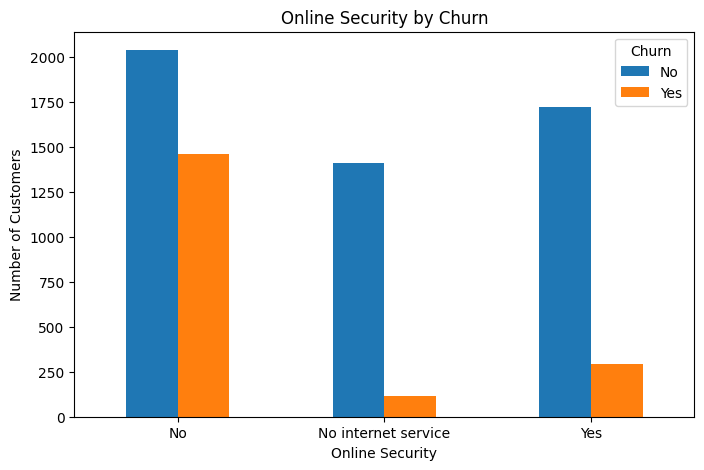

In [148]:
plt.figure(figsize=(8,5))

# Count of churn per online security
online_security_churn = df.groupby(['OnlineSecurity', 'Churn']).size().unstack()

# Double bar chart
online_security_churn.plot(kind='bar', figsize=(8,5))

plt.title('Online Security by Churn')
plt.xlabel('Online Security')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

here we can see a correlation between online security and churn. where customers who have no online security tend to churn.

### Tech Support by Churn

<Figure size 800x500 with 0 Axes>

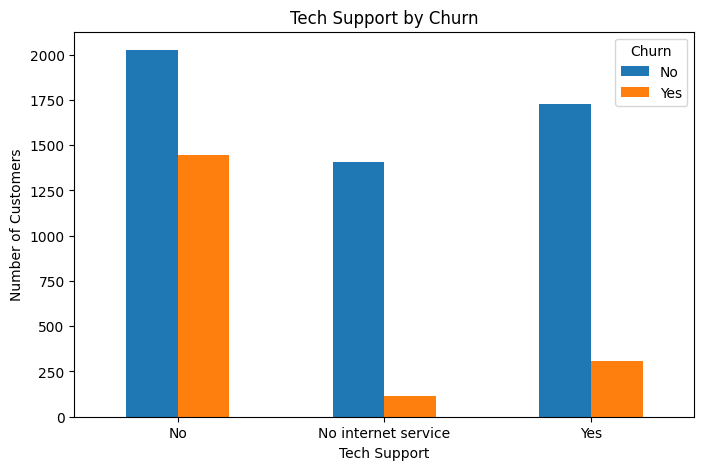

In [149]:
plt.figure(figsize=(8,5))

# Count of churn per tech support
tech_support_churn = df.groupby(['TechSupport', 'Churn']).size().unstack()

# Double bar chart
tech_support_churn.plot(kind='bar', figsize=(8,5))

plt.title('Tech Support by Churn')
plt.xlabel('Tech Support')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

here we can see a correlation between Tech Support and churn. where customers who have no tech support tend to churn.